In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from __future__ import division

In [21]:
import pandas
from StringIO import StringIO



Одна из проблем при экспрессии белков связана с редкими кодонами в кодирующей последовательности. В таблице приведены частоты встречаемости (на 1000) кодонов в генах различных организмов. Если бы распределение было равномерным, то частота для всех кодонов была бы в районе 16.4.

   Представленные данные взяты из "Codon-Usage Database" содержащей 392,382 полных кодирующих последовательностей (CDS's) для 11,713 организмов. Об этой базе данных можно прочитать в статье "Codon usage tabulated from the international DNA sequence databases: status for the year 2000". Nakamura, Y., Gojobori, T. and Ikemura, T. (2000) Nucl. Acids Res. 28, 292.

   О влиянии редких кодонов на экспрессию белков можно почитать в обзоре: "Effects of rare codon clusters on high-level expression of heterologous proteins in Escherichia coli" [Review article] James F Kane Current Opinion in Biotechnology 1995, 6:494-500.
    

In [33]:
spec=dict([_s.strip().split(' ',1) for _s in '''
    HUM Homo sapiens
    MUS Mus musculus
    DRO Drosophila melanogaster
    ATH Arabidopsis thaliana
    YSC Saccharomyces cerevisiae
    PIC Pichia pastoris
    ECO Escherichia coli
    '''.strip().split('\n')])
spec

{'ATH': 'Arabidopsis thaliana',
 'DRO': 'Drosophila melanogaster',
 'ECO': 'Escherichia coli',
 'HUM': 'Homo sapiens',
 'MUS': 'Mus musculus',
 'PIC': 'Pichia pastoris',
 'YSC': 'Saccharomyces cerevisiae'}

Выберем часть кодонов - 6 из них кодируют аргинин и 6 - серин. 
http://molbiol.ru/protocol/18_05.html

In [118]:
s='''Am	Codon	HUM	MUS	DRO	ATH	YSC	PIC	ECO
Arg	CGA	6.2	6.6	8.5	6.3	3.0	4.4	4.1
Arg	CGC	10.6	9.5	18.1	3.8	2.6	2.2	18.3
Arg	CGG	11.5	10.4	8.2	4.9	1.8	2.0	6.5
Arg	CGU	4.6	4.7	8.8	9.0	6.4	6.8	18.8
Arg	AGA	11.9	11.6	5.2	18.9	21.3	20.2	4.5
Arg	AGG	11.9	11.9	6.3	10.9	9.3	6.6	2.6
Leu	CUA	7.1	7.9	8.2	9.9	13.4	10.9	4.5
Leu	CUC	19.7	20.2	13.8	16.1	5.4	7.5	10.1
Leu	CUG	39.9	39.9	38.3	9.8	10.5	15.1	45.8
Leu	CUU	13.1	13.2	8.9	24.1	12.3	15.7	12.6
Leu	UUA	7.6	6.5	4.4	12.7	26.2	15.6	15.0
Leu	UUG	12.8	13.3	16.1	20.9	27.1	31.2	12.9
Ser	UCA	12.2	11.6	7.8	18.2	18.7	15.4	10.0
Ser	UCC	17.7	18.0	19.5	11.2	14.2	16.2	9.3
Ser	UCG	4.5	4.3	16.7	9.3	8.6	7.1	8.5
Ser	UCU	15.1	16.0	7.0	25.1	23.4	23.9	11.0
Ser	AGC	19.4	19.6	20.5	11.3	9.7	7.7	15.0
Ser	AGU	12.1	12.5	11.5	14.0	14.2	12.8	10.8
Thr	ACA	15.0	15.8	11.1	15.7	17.8	13.7	10.8
Thr	ACC	19.0	19.1	21.3	10.3	12.6	14.3	21.3
Thr	ACG	6.1	5.8	14.5	7.7	8.0	6.0	13.8
Thr	ACU	13.0	13.6	9.5	17.6	20.2	22.3	11.0
Pro	CCA	16.9	17.1	13.5	16.1	18.1	18.4	8.7
Pro	CCC	19.9	18.3	18.0	5.3	6.8	6.7	5.6
Pro	CCG	7.0	6.2	16.0	8.6	5.3	4.2	19.3
Pro	CCU	17.5	18.4	6.9	18.7	13.5	16.0	8.0
Ala	GCA	15.9	15.9	12.8	17.5	16.2	15.0	21.6
Ala	GCC	28.0	26.4	33.6	10.4	12.6	16.5	23.8
Ala	GCG	7.5	6.6	14.1	9.0	6.2	3.8	27.9
Ala	GCU	18.5	20.2	14.4	28.4	21.1	29.0	17.4
Gly	GGA	16.4	16.8	17.7	24.2	10.9	19.1	10.7
Gly	GGC	22.4	21.6	26.6	9.2	9.8	8.0	25.5
Gly	GGG	16.5	15.3	4.7	10.2	6.0	5.8	11.6
Gly	GGU	10.8	11.5	13.2	22.3	23.8	26.0	24.9
Val	GUA	7.1	7.4	6.4	9.9	11.8	9.8	12.0
Val	GUC	14.6	15.5	13.9	12.8	11.6	14.8	14.0
Val	GUG	28.3	28.9	27.8	17.4	10.8	12.2	23.4
Val	GUU	11.0	10.6	10.9	27.3	22.0	27.1	20.1
Lys	AAA	24.2	21.7	16.8	30.8	42.0	30.4	35.6
Lys	AAG	32.0	34.1	39.6	32.7	30.8	34.7	13.1
Asn	AAC	19.1	20.6	26.3	20.9	24.8	26.1	21.1
Asn	AAU	16.8	15.5	21.1	22.3	35.8	24.6	23.0
Gln	CAA	12.1	11.5	15.7	19.4	27.3	25.3	14.4
Gln	CAG	34.2	34.3	36.5	15.2	12.2	16.2	28.0
His	CAC	15.1	15.2	16.0	8.7	7.8	9.1	8.8
His	CAU	10.8	10.3	10.6	13.7	13.7	11.9	12.5
Glu	GAA	28.7	26.9	21.0	34.3	45.7	39.0	37.9
Glu	GAG	39.6	39.9	42.7	32.3	19.3	29.7	18.8
Asp	GAC	25.2	26.5	24.6	17.3	20.2	26.2	18.8
Asp	GAU	21.7	21.2	27.5	36.7	37.7	36.0	32.9
Tyr	UAC	15.3	16.3	18.3	13.8	14.7	18.2	12.0
Tyr	UAU	12.1	12.1	10.8	14.7	18.8	15.2	18.4
Cys	UGC	12.6	12.0	13.2	7.1	4.7	4.2	6.0
Cys	UGU	10.5	11.0	5.4	10.5	8.0	7.7	5.4
Phe	UUC	20.4	21.9	21.9	20.7	18.4	19.8	15.6
Phe	UUU	17.4	17.0	13.2	21.8	26.2	23.6	22.6
Ile	AUA	7.4	7.1	9.5	12.6	17.8	11.7	8.3
Ile	AUC	20.9	22.9	22.9	18.6	17.1	19.6	22.6
Ile	AUU	15.8	15.4	16.5	21.5	30.1	30.8	29.7
Met	AUG	22.1	22.9	23.6	24.5	21.0	18.1	25.9
Trp	UGG	13.2	12.3	9.9	12.5	10.4	10.3	13.8
Ter	UAA(ochre)	1.0	0.7	0.8	0.9	1.0	0.9	2.0
Ter	UAG(amber)	0.8	0.6	0.6	0.5	0.5	0.5	0.3
Ter	UGA(opal)	1.6	1.2	0.5	1.1	0.7	0.3	1.0
'''

Возможных комбинаций кодонов $ 4 ^ 3 = 64$, 3 - терминальные.
Оценка равной вероятности:

In [154]:
p0=1000/61
p0

16.39344262295082

In [120]:
A=pandas.DataFrame.from_csv(StringIO(s), index_col=(0,1), sep='\t')
A

HUM   MUS   DRO   ATH   YSC   PIC   ECO
Am  Codon                                               
Arg CGA          6.2   6.6   8.5   6.3   3.0   4.4   4.1
    CGC         10.6   9.5  18.1   3.8   2.6   2.2  18.3
    CGG         11.5  10.4   8.2   4.9   1.8   2.0   6.5
    CGU          4.6   4.7   8.8   9.0   6.4   6.8  18.8
    AGA         11.9  11.6   5.2  18.9  21.3  20.2   4.5
    AGG         11.9  11.9   6.3  10.9   9.3   6.6   2.6
Leu CUA          7.1   7.9   8.2   9.9  13.4  10.9   4.5
    CUC         19.7  20.2  13.8  16.1   5.4   7.5  10.1
    CUG         39.9  39.9  38.3   9.8  10.5  15.1  45.8
    CUU         13.1  13.2   8.9  24.1  12.3  15.7  12.6
    UUA          7.6   6.5   4.4  12.7  26.2  15.6  15.0
    UUG         12.8  13.3  16.1  20.9  27.1  31.2  12.9
Ser UCA         12.2  11.6   7.8  18.2  18.7  15.4  10.0
    UCC         17.7  18.0  19.5  11.2  14.2  16.2   9.3
    UCG          4.5   4.3  16.7   9.3   8.6   7.1   8.5
    UCU         15.1  16.0   7.0  25.1  23.4  23.9  11.0
    AGC         19.4  19.6  20.5  11.3   9.7   7.7  15.0
    AGU         12.1  12.5  11.5  14.0  14.2  12.8  10.8
Thr ACA         15.0  15.8  11.1  15.7  17.8  13.7  10.8
    ACC         19.0  19.1  21.3  10.3  12.6  14.3  21.3
    ACG          6.1   5.8  14.5   7.7   8.0   6.0  13.8
    ACU         13.0  13.6   9.5  17.6  20.2  22.3  11.0
Pro CCA         16.9  17.1  13.5  16.1  18.1  18.4   8.7
    CCC         19.9  18.3  18.0   5.3   6.8   6.7   5.6
    CCG          7.0   6.2  16.0   8.6   5.3   4.2  19.3
    CCU         17.5  18.4   6.9  18.7  13.5  16.0   8.0
Ala GCA         15.9  15.9  12.8  17.5  16.2  15.0  21.6
    GCC         28.0  26.4  33.6  10.4  12.6  16.5  23.8
    GCG          7.5   6.6  14.1   9.0   6.2   3.8  27.9
    GCU         18.5  20.2  14.4  28.4  21.1  29.0  17.4
...              ...   ...   ...   ...   ...   ...   ...
Val GUA          7.1   7.4   6.4   9.9  11.8   9.8  12.0
    GUC         14.6  15.5  13.9  12.8  11.6  14.8  14.0
    GUG         28.3  28.9  27.8  17.4  10.8  12.2  23.4
    GUU         11.0  10.6  10.9  27.3  22.0  27.1  20.1
Lys AAA         24.2  21.7  16.8  30.8  42.0  30.4  35.6
    AAG         32.0  34.1  39.6  32.7  30.8  34.7  13.1
Asn AAC         19.1  20.6  26.3  20.9  24.8  26.1  21.1
    AAU         16.8  15.5  21.1  22.3  35.8  24.6  23.0
Gln CAA         12.1  11.5  15.7  19.4  27.3  25.3  14.4
    CAG         34.2  34.3  36.5  15.2  12.2  16.2  28.0
His CAC         15.1  15.2  16.0   8.7   7.8   9.1   8.8
    CAU         10.8  10.3  10.6  13.7  13.7  11.9  12.5
Glu GAA         28.7  26.9  21.0  34.3  45.7  39.0  37.9
    GAG         39.6  39.9  42.7  32.3  19.3  29.7  18.8
Asp GAC         25.2  26.5  24.6  17.3  20.2  26.2  18.8
    GAU         21.7  21.2  27.5  36.7  37.7  36.0  32.9
Tyr UAC         15.3  16.3  18.3  13.8  14.7  18.2  12.0
    UAU         12.1  12.1  10.8  14.7  18.8  15.2  18.4
Cys UGC         12.6  12.0  13.2   7.1   4.7   4.2   6.0
    UGU         10.5  11.0   5.4  10.5   8.0   7.7   5.4
Phe UUC         20.4  21.9  21.9  20.7  18.4  19.8  15.6
    UUU         17.4  17.0  13.2  21.8  26.2  23.6  22.6
Ile AUA          7.4   7.1   9.5  12.6  17.8  11.7   8.3
    AUC         20.9  22.9  22.9  18.6  17.1  19.6  22.6
    AUU         15.8  15.4  16.5  21.5  30.1  30.8  29.7
Met AUG         22.1  22.9  23.6  24.5  21.0  18.1  25.9
Trp UGG         13.2  12.3   9.9  12.5  10.4  10.3  13.8
Ter UAA(ochre)   1.0   0.7   0.8   0.9   1.0   0.9   2.0
    UAG(amber)   0.8   0.6   0.6   0.5   0.5   0.5   0.3
    UGA(opal)    1.6   1.2   0.5   1.1   0.7   0.3   1.0

[64 rows x 7 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117EF6D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11B63FD0>]], dtype=object)

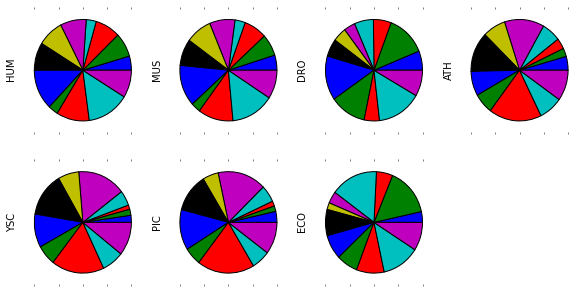

In [62]:
A.plot(kind='pie',subplots=True, figsize=(10, 5), labels=None, layout=[2,4]);

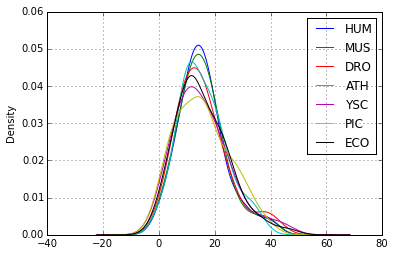

In [127]:
A.plot(kind='density');

In [156]:
A=A-p0

In [157]:
U,sigma,V = svd(A, full_matrices=False)
sigma

array([ 155.90509657,   88.38299524,   52.52879423,   29.80419437,
         24.89140322,   16.69400044,    3.97487486])

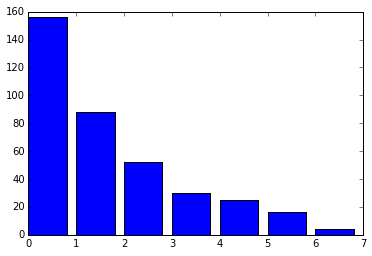

In [158]:
bar(arange(len(sigma)),sigma);

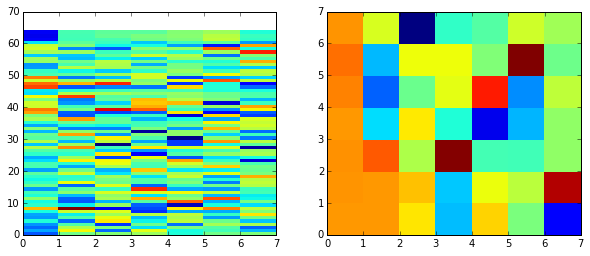

In [159]:
figure(figsize=[10,4])
subplot(121); pcolor(U);
subplot(122); pcolor(V.T);

In [161]:
nF=3
W=diag(sigma)
Q = dot(W[:nF,:nF],V[:nF,:]);
B = dot(U[:,:nF], Q);
sum(sigma[:nF]**2)/sum(sigma**2)

0.95086201035151907

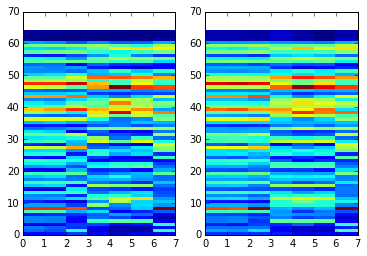

In [162]:
subplot(121); pcolor(A); subplot(122); pcolor(B);

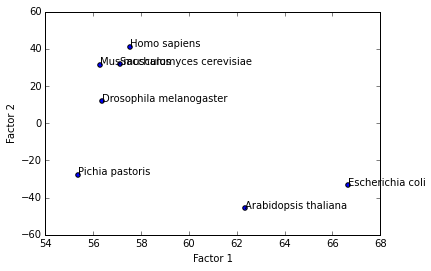

In [163]:
ax=axes()
i1,i2=0,1
ax.scatter(Q[i1,:],Q[i2,:]);
[text(Q[i1,i],Q[i2,i],spec[_s]) for i,_s in enumerate(spec)];
xlabel('Factor 1'); ylabel('Factor 2');

In [164]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

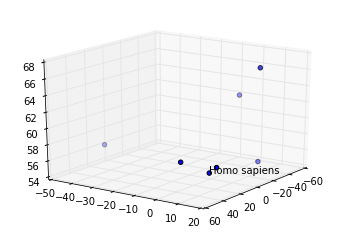

In [168]:
ax=subplot(111, projection='3d')
ax.scatter(Q[1,:],Q[2,:],Q[0,:])
ax.view_init(20, 35)
i=0
ax.text(Q[1,i],Q[2,i],Q[0,i],spec[A.columns[i]])

In [144]:
A.columns[i]

'HUM'